# Lab 1

## Rob Misasi (CRM3889)

### 1.

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.


1. Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
2. Estimate the mean and the variance of the sum.

### Answer

#### 1.1 

In [1]:
import numpy as np

mu1, sigma1 = -10, 5
mu2, sigma2 = 10, 5
samples = 1000

dis1 = np.random.normal(mu1, sigma1, samples)
dis2 = np.random.normal(mu2, sigma2, samples)

In [2]:
import matplotlib.pyplot as plt

dis3 = dis1 + dis2
fig = plt.figure()
plt.hist(dis3, bins=16)

(array([  6.,   4.,  10.,  21.,  51.,  64., 132., 144., 173., 137., 104.,
         88.,  43.,  15.,   6.,   2.]),
 array([-23.76580287, -20.9453812 , -18.12495952, -15.30453784,
        -12.48411617,  -9.66369449,  -6.84327281,  -4.02285113,
         -1.20242946,   1.61799222,   4.4384139 ,   7.25883558,
         10.07925725,  12.89967893,  15.72010061,  18.54052229,
         21.36094396]),
 <a list of 16 Patch objects>)

We observe that the sum of the original sets is roughly centered around a mean of zero. The values also lie mostly between extremes of -20 and 20, indicating that the variance has increased.

#### 1.2

The estimated mean is 0 and the estimated variance is 50. We can observe the estimated mean in the plot above. The estimated variance is taken by summing the individual variances of each random variable, since they are independent and uncorrelated.

### 2.

*Central Limit Theorem*. Let $X_i$ be an iid Bernoulli random variable with value $\{-1,1\}$.
Look at the random variable $Z_n = \frac{1}{n} \sum X_i$. By taking 1000 draws from $Z_n$, plot its histogram. Check that for small $n$ (say, $5-10$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n = 30$ or $50$) it looks much more like a Gaussian. Check also for much bigger $n: n = 250$, to see that at this point, one can really see the bell curve.

### Answer

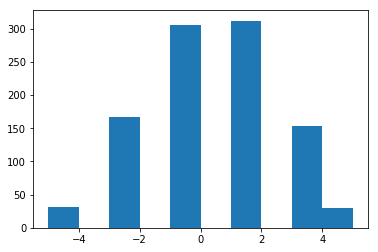

In [3]:
draws = 1000
ns = [5, 10, 30, 50, 250]
p = 0.5

def clt(n, p, draws, bins=None):
    res = np.random.binomial(n, p, draws)
    #print(res)
    actual = []
    for ans in res:
        actual.append(ans - (n - ans))
    #print(actual)
    plt.hist(actual, bins=bins)
    
clt(ns[0], p, draws)

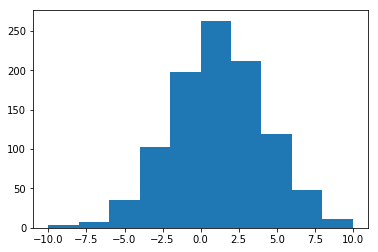

In [4]:
clt(ns[1], p, draws)

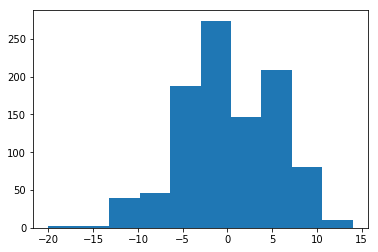

In [5]:
clt(ns[2], p, draws, bins=10)

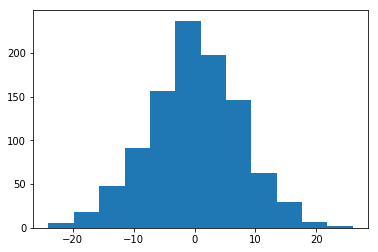

In [6]:
clt(ns[3], p, draws, bins=12)

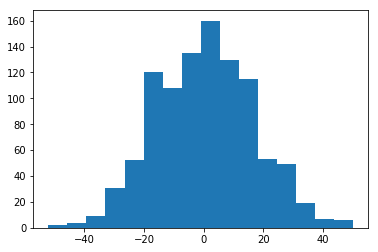

In [7]:
clt(ns[4], p, draws, bins=16)

### 3.

Estimate the mean and standard deviation from $1$ dimensional data: generate $25,000$ samples from a Gaussian distribution with mean $0$ and standard deviation $5$. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

### Answer

In [8]:
mu, sigma, samples = 0, 5, 25000

dist = np.random.normal(mu, sigma, samples)
expectation = sum(dist)/samples
print("Estimated Expectation: {0}".format(expectation))
variance = sum([(x - expectation)**2 for x in dist]) / (samples - 1)
print("Estimated Variance: {0}".format(variance))

Estimated Expectation: 0.03335134145767875
Estimated Variance: 25.205651592703678


### 4.

### Answer

In [9]:
mu = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]
samples = 10000
dist = np.random.multivariate_normal(mu, cov, samples)
print(dist)

[[-14.03368474  10.56266324]
 [  0.19457499  15.65576479]
 [ -2.89794455  -2.17847601]
 ...
 [ -0.07425925  -0.19359601]
 [ -4.86618676   2.92454537]
 [ -3.80518271   0.88045192]]


In [10]:
X = dist[:, 0]
Y = dist[:, 1]

X_mean = sum(X)/samples
Y_mean = sum(Y)/samples

X_var = sum([(x - X_mean)**2 for x in X])/(samples - 1)
Y_var = sum([(y - Y_mean)**2 for y in Y])/(samples - 1)

X_sub_mean = [x - X_mean for x in X]
Y_sub_mean = [y - Y_mean for y in Y]

cov = sum([(x)*(y) for x, y in zip(X_sub_mean, Y_sub_mean)])/(samples-1)
print("X mean: {0}".format(X_mean))
print("Y mean: {0}".format(Y_mean))
print("Var(X) = {0}".format(X_var))
print("Var(y) = {0}".format(Y_var))
print("Covariance: [[{0}, {1}], [{1}, {2}]]".format(X_var, cov, Y_var))

X mean: -4.942266426091552
Y mean: 5.103133820795596
Var(X) = 19.877796646766463
Var(y) = 29.906750900465493
Covariance: [[19.877796646766463, 0.797137112347493], [0.797137112347493, 29.906750900465493]


### 5.

Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
1. How many patients and how many features are there?
2. What is the meaning of the first 4 features? See if you can understand what they mean.
3. Are there missing values? Replace them with the average of the corresponding feature column
4. How could you test which features strongly influence the patient condition and which do not?

List what you think are the three most important features.

In [42]:
import pandas as pd

patient_data = pd.read_csv('PatientData.csv', dtype="object")
patient_data.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [43]:
patient_data.shape

(451, 280)

### Answer 

#### 5.1

There are 451 patients and 280 features

#### 5.2

Feature 0: Age in years

Feature 1: Gender

Feature 2: Height in centimeters

Feature 3: Weight in kilograms

#### 5.3

Yes, some columns, like column 13, contain missing values.

In [55]:
for i in range (patient_data.shape[0]):
    col_sum = 0
    count = 0
    for j in range(patient_data.shape[1]):
        if (patient_data.values[i][j] == '?'):
            continue
        col_sum += float(patient_data.values[i][j])
        count += 1
        
    col_avg = col_sum/count
    for j in range(patient_data.shape[1]):
        if (patient_data.values[i][j] == '?'):
            patient_data.values[i][j] = str(col_avg)
            
patient_data = patient_data.astype("float")
print(patient_data.values)

[[ 56.    1.  165.  ...  20.4  38.8   6. ]
 [ 54.    0.  172.  ...  12.3  49.   10. ]
 [ 55.    0.  175.  ...  34.6  61.6   1. ]
 ...
 [ 36.    0.  166.  ... -44.2 -33.2   2. ]
 [ 32.    1.  155.  ...  25.   46.6   1. ]
 [ 78.    1.  160.  ...  21.3  32.8   1. ]]


#### 5.4

If we run linear regression on the data set, the magnitude of the coefficients $\beta_1,...,\beta_n$ will tell us which features have the biggest impact on the label. The larger the magnitude of the coefficient, the larger its influence.

In [70]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
X = [row[0:len(row) - 1] for row in patient_data.values]
y = [row[len(row) - 1] for row in patient_data.values]
model.fit(X,y)
beta = model.coef_
rank = np.argsort([abs(b) for b in beta])
for i in range(3):
    index = rank[-1 * i - 1]
    print("Index: " + str(index) + "   Beta coefficient value: " + str(beta[index]))

Index: 234   Beta coefficient value: -377.0213913830571
Index: 244   Beta coefficient value: 163.84533435831474
Index: 254   Beta coefficient value: 115.29176947667432


The 3 most important features are displayed above in order of the magnitude of their coefficients. These come from the solution to the emperical risk minimization problem under the assumption that the patients' conditions is a numerical quantity.

## Written Questions

### 1. 

### Answer 

#### 1.1

$P(X = 1) = \frac{7}{12}$

#### 1.2

$P(X = 1 | Y=1) = \frac{2}{3}$

#### 1.3

$Var(X) = E\left[X^2\right] - {E\left[X\right]}^2$

$= \frac{7}{12} - \frac{49}{144}$

$= \frac{84}{144} - \frac{49}{144}$

$= \frac{35}{144}$

#### 1.4

$Var(X | Y=1) = E \left[ X^2 | Y=1 \right] - {E \left[ X| Y=1 \right]}^2$ 

$= \frac{2}{3} - {\left(\frac{2}{3}\right)}^2$

$= \frac{6}{9} - {\frac{4}{9}}$

$= \frac{2}{9}$

#### 1.5

$E\left[X^3 + X^2 + 3Y^7 | Y = 1\right]$

$= E\left[X^3 + X^2 | Y=1\right] + 3$

$= E\left[X^3 | Y=1\right] E\left[X^2|Y=1\right] + 3$

$= \frac{2}{3} + \frac{2}{3} + 3$

$= \frac{13}{3}$

#### 2.

We can construct an orthogonal basis $\{\mathbf{u}_1,\mathbf{u}_2\}$ for the subspace $V$
from the given vectors $\{\mathbf{v}_1,\mathbf{v}_2\}$ using the Gram-Schmidt process.

Once we have our orthogonal basis we can construct the orthogonal projection of any point $\mathbf{p}$ onto the subspace with the formula:
$\mathrm{proj}_V\mathbf{p} = \frac{\langle \mathbf{p}, \mathbf{u}_1\rangle}{\|\mathbf{u}_1\|^2}\mathbf{u}_1
 + \frac{\langle \mathbf{p}, \mathbf{u}_2\rangle}{\|\mathbf{u}_2\|^2}\mathbf{u}_2$
 
Once we have obtained $\mathrm{proj}_V\mathbf{p}$, the coordinates of the point $\mathbf{p}$ can be found by solving the equation $\mathbf{Ax}=\mathbf{b}$ for $\mathbf{x}$, where $\mathbf{A}=(\mathbf{v}_1\mathbf{v}_2)$ and $\mathbf{b}=\mathrm{proj}_V\mathbf{p}$. Since $\mathbf{b}\in V$ the equation will be consistent.

Since the columns of $\mathbf{A}$ are linearly independent, $\mathbf{A}^T\mathbf{A}$ has an inverse. Thus the system has the solution $\mathbf{x} = \left(\mathbf{A}^T\mathbf{A}\right)^{-1}\mathbf{A}^T\mathbf{b}$. The vector $\mathbf{x}$ is the coordinates of $\mathbf{p}$ with respect to the basis $\{\mathbf{v}_1,\mathbf{v}_2\}$.

In [35]:
import numpy as np

v1 = np.asarray([1, 1, 1])
v2 = np.asarray([1, 0 ,0])

# Create the orthonormal basis
u1 = v2
u2 = v1 - (v1.dot(u1) * u1)/(np.linalg.norm(u1)**2)

p1 = np.asarray([3, 3, 3])
p2 = np.asarray([1, 2, 3])
p3 = np.asarray([0, 0, 1])

def project(u, v):
    u1 = u[0]
    u2 = u[1]
    
    return (u1.dot(v) * u1)/(np.linalg.norm(u1)**2) + (u2.dot(v) * u2) / (np.linalg.norm(u2)**2)

proj_p1 = project([u1, u2], p1)
proj_p2 = project([u1, u2], p2)
proj_p3 = project([u1, u2], p3)

print("The point {0} turns into {1} when projected onto the subspace spanned by v1 and v2".format(p1, project([u1, u2], p1)))
print("The point {0} turns into {1} when projected onto the subspace spanned by v1 and v2".format(p2, project([u1, u2], p2)))
print("The point {0} turns into {1} when projected onto the subspace spanned by v1 and v2".format(p3, project([u1, u2], p3)))

A = np.asarray([[1,1],
                [1,0],
                [1,0]])
def coordinates(A, p):
    mul = np.matmul
    inv = np.linalg.inv
    return mul(inv(mul(A.T,A)),A.T.dot(p))

c1 = coordinates(A, p1)
c2 = coordinates(A, p2)
c3 = coordinates(A, p3)

print("\nThe coordinates of p1 with respect to the basis {{v1, v2}} is ({0:.2},{1:.2})".format(c1[0], c1[1]))
print("The coordinates of p2 with respect to the basis {{v1, v2}} is ({0:.2},{1:.2})".format(c2[0], c2[1]))
print("The coordinates of p3 with respect to the basis {{v1, v2}} is ({0:.2},{1:.2})".format(c3[0], c3[1]))


The point [3 3 3] turns into [3. 3. 3.] when projected onto the subspace spanned by v1 and v2
The point [1 2 3] turns into [1.  2.5 2.5] when projected onto the subspace spanned by v1 and v2
The point [0 0 1] turns into [0.  0.5 0.5] when projected onto the subspace spanned by v1 and v2

The coordinates of p1 with respect to the basis {v1, v2} is (3.0,0.0)
The coordinates of p2 with respect to the basis {v1, v2} is (2.5,-1.5)
The coordinates of p3 with respect to the basis {v1, v2} is (0.5,-0.5)


#### 3.

We can estimate the probability of getting 50 or fewer heads with the central limit theorem:
$P\left(S_{100}\leq50\right)=P\left(\frac{S_{100}-(100)E[X_i]}{\sqrt{100\mathrm{Var}(X_i)}}\leq\frac{50-(100)E[X_i]}{\sqrt{100\mathrm{Var}(X_i)}}\right)\approx P\left(Z\leq\frac{50-(100)E[X_i]}{\sqrt{100\mathrm{Var}(X_i)}}\right)$<br>
Every $X_i$ is a Bernoulli random variable with $p=\frac{2}{3}$ so $E[X_i]=\frac{2}{3}$ and $\mathrm{Var}(X_i)=\frac{2}{3}\left(1-\frac{2}{3}\right)=\frac{2}{9}$<br>
So the probability we want is:
$P\left(S_{100}\leq50\right)\approx P\left(Z\leq\frac{50-(100)\frac{2}{3}}{\sqrt{(100)\frac{2}{9}}}\right)=P\left(Z<\frac{-5}{\sqrt{2}}\right)=\Phi\left(\frac{-5}{\sqrt{2}}\right)\approx0.000204$

We can also calculate the probability directly since $S_{100}\sim\mathrm{Binomial}\left(100,\frac{2}{3}\right)$:<br>
$P\left(S_{100}\leq50\right)=\sum_{i=0}^50\binom{100}{i}\left(\frac{2}{3}\right)^i\left(1-\frac{2}{3}\right)^{100-i}$

In [45]:
from scipy import special

prob_sum = 0.0
p = 2/3
prob_sum = 0 #misc.comb(100, 50) * p**50 + i*(1-p)**50
for i in range(51):
   prob_sum += ((special.comb(100, i) * p**i )*(1-p)**(100-i))
print("The probability of flipping 50 or fewer heads is {0}".format(prob_sum))

The probability of flipping 50 or fewer heads is 0.00041934108267445034
